In [30]:
#1

(a)

In [2]:
library(tidyverse)
library(readr)

In [6]:
data_exam <- read.table("Table3.10.txt", 
                        head = TRUE,
                        sep = "\t")
#data_exam

Model 1: $F=\beta_{0}+\beta_{1} P_{1}+\varepsilon$

In [8]:
mod_exam1 <- lm(F ~ P1, data_exam)
print(summary(mod_exam1))


Call:
lm(formula = F ~ P1, data = data_exam)

Residuals:
   Min     1Q Median     3Q    Max 
-8.844 -2.020 -0.587  4.043  7.938 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -22.3424    11.5640  -1.932   0.0676 .  
P1            1.2605     0.1399   9.008 1.78e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.081 on 20 degrees of freedom
Multiple R-squared:  0.8023,	Adjusted R-squared:  0.7924 
F-statistic: 81.14 on 1 and 20 DF,  p-value: 1.779e-08



Model 2: $F=\beta_{0}+\beta_{2} P_{2}+\varepsilon$

In [9]:
mod_exam2 <- lm(F ~ P2, data_exam) 
print(summary(mod_exam2))


Call:
lm(formula = F ~ P2, data = data_exam)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.4323  -1.5027   0.5421   2.2580   7.5165 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.85355    7.56181  -0.245    0.809    
P2           1.00427    0.09059  11.086 5.44e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.275 on 20 degrees of freedom
Multiple R-squared:   0.86,	Adjusted R-squared:  0.853 
F-statistic: 122.9 on 1 and 20 DF,  p-value: 5.442e-10



Model 3: $F=\beta_{0}+\beta_{1} P_{1}+\beta_{2} P_{2}+\varepsilon$

In [11]:
mod_exam3 <- lm(F ~ P1 + P2, data_exam) 
print(summary(mod_exam3))


Call:
lm(formula = F ~ P1 + P2, data = data_exam)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.7328 -2.1703  0.3938  2.6443  6.3660 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) -14.5005     9.2356  -1.570  0.13290   
P1            0.4883     0.2330   2.096  0.04971 * 
P2            0.6720     0.1793   3.748  0.00136 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.953 on 19 degrees of freedom
Multiple R-squared:  0.8863,	Adjusted R-squared:  0.8744 
F-statistic: 74.07 on 2 and 19 DF,  p-value: 1.069e-09



In [14]:
library(olsrr)

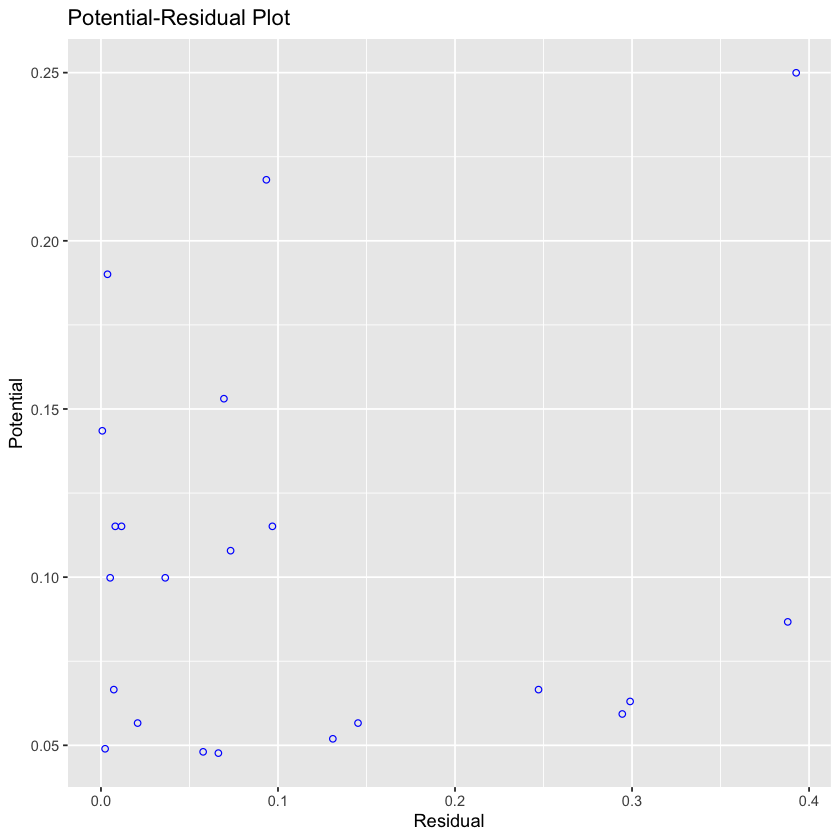

In [15]:
p1 <- ols_plot_resid_pot(mod_exam1, print_plot = TRUE)

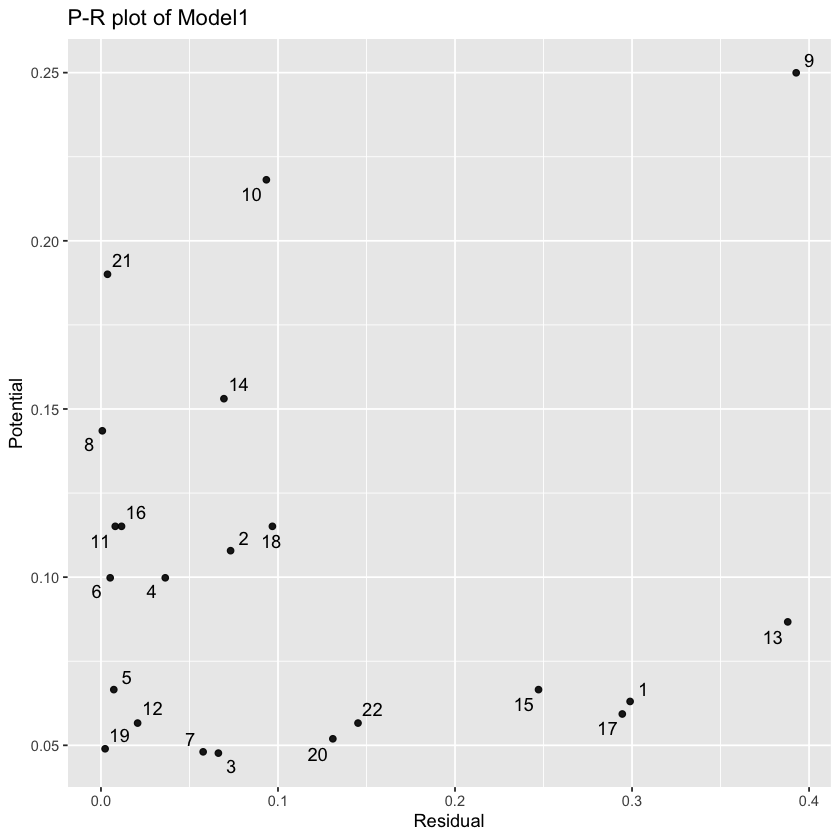

In [24]:
mod_p_R_data1 <- cbind(num = 1:nrow(data_exam), p1$data)
ggplot(data = mod_p_R_data1,
       aes(x = res, y = pot)) + geom_point(alpha=0.9) + ggrepel::geom_text_repel(aes(label = num)) + xlab("Residual") +
    ylab("Potential") + ggtitle("P-R plot of Model1")


As the P-R plot of model1 shows, we can classify student 21/10 as high-leverage points, student 1/13/15/17 as outliers, student 9 as a combination of both.

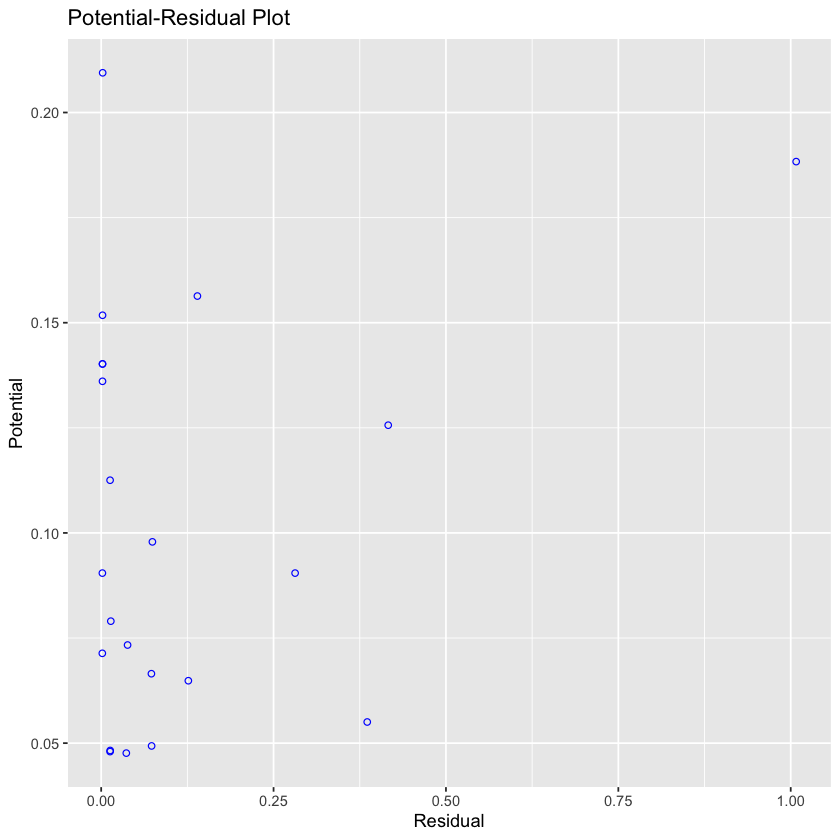

In [25]:
p2 <- ols_plot_resid_pot(mod_exam2, print_plot = TRUE)

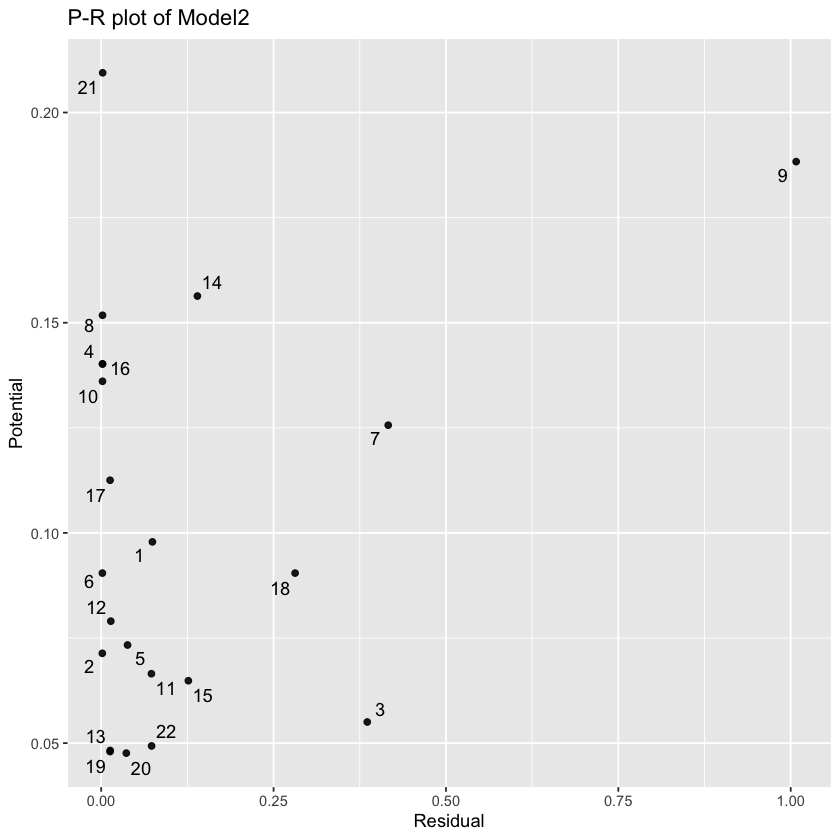

In [27]:
mod_p_R_data2 <- cbind(num = 1:nrow(data_exam), p2$data) 
ggplot(data = mod_p_R_data2,aes(x = res, y = pot)) + 
geom_point(alpha=0.9) + ggrepel::geom_text_repel(aes(label = num)) +
xlab("Residual") +
ylab("Potential") +
ggtitle("P-R plot of Model2")

As the P-R plot of model2 shows, we can classify student 21 as a high-leverage point, student 3 as an outlier, student 9 as a combination of both.

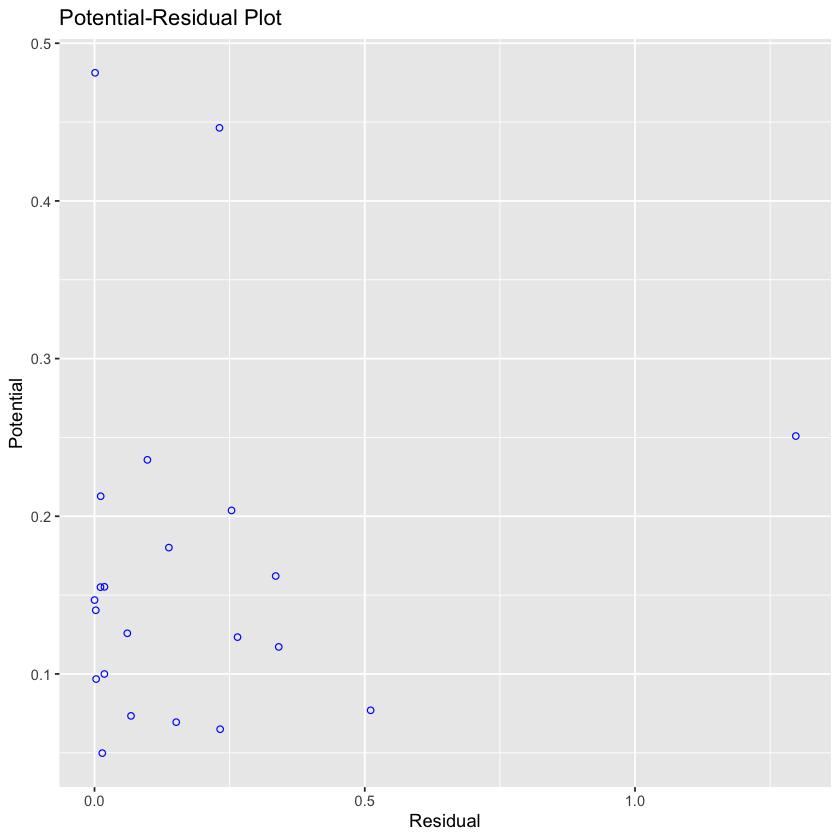

In [28]:
p3 <- ols_plot_resid_pot(mod_exam3, print_plot = TRUE)

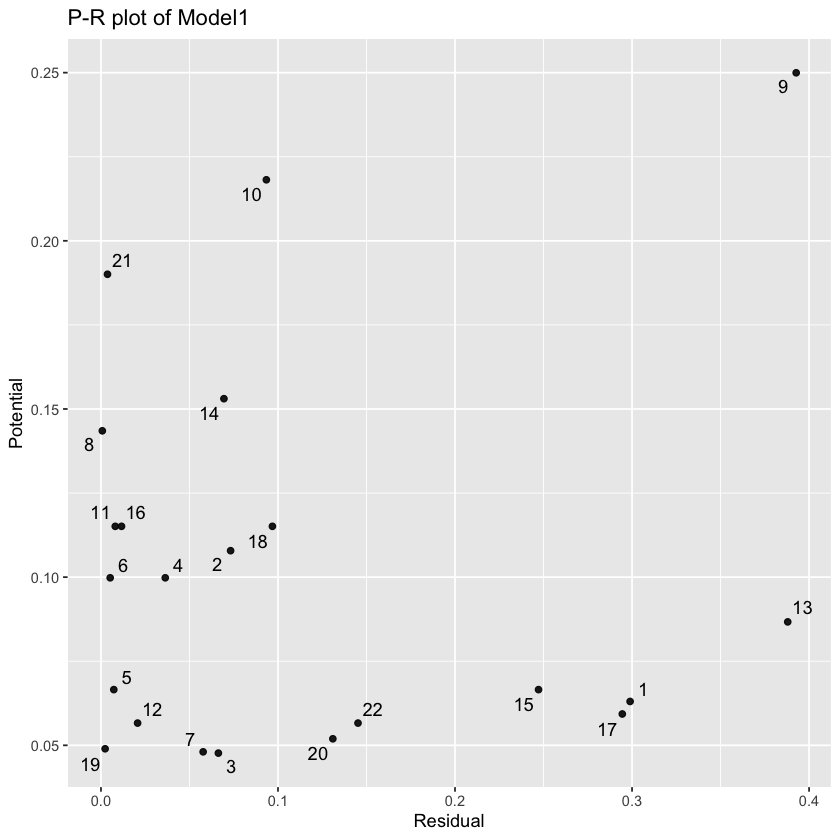

In [29]:
mod_p_R_data3 <- cbind(num = 1:nrow(data_exam), p1$data) 
ggplot(data = mod_p_R_data3, aes(x = res, y = pot)) + geom_point(alpha=0.9) + ggrepel::geom_text_repel(aes(label = num)) +
xlab("Residual") +
ylab("Potential") +
ggtitle("P-R plot of Model1")

As the P-R plot of model 3 shows, we can classify student 21/10 as high-leverage points, student 1/15/13/17 as outlier, student 9 as a combination of both.

(b)

I would like to use model2 to predict the final score F because the P-R plots of model 3 are more concentrated and indicate fewer outliers and high-leverage points, which means that model 3 utilizes more sample information and has higher accuracy.